# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [104]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress


# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [105]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 606


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [106]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"


# Define an empty list to fetch the weather data for each city
city_data = []
city_lat =[]
city_max_temp =[]
city_humidity=[]
city_wind =[]
city_lng=[]
city_date=[]
city_country=[]
city_clouds=[]

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units={units}&q="

    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
try:
        # Parse the JSON and retrieve data
        response = requests.get(city_url + city)
        
        city_weather = response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat.append(city_weather['coord']['lat'])
        city_lng.append(city_weather['coord']['lon'])
        city_max_temp.append(city_weather['main']['city_max_temp'])
        city_humidity.append(city_weather['main']['humidity'])
        city_clouds.append(city_weather['clouds']['all'])
        city_wind.append(city_weather['wind']['speed'])
        city_country.append(city_weather['sys']['country'])
        city_date.append(city_weather['dt'])

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
except:
    print("City not found. Skipping...")
    city_lat.append(np.nan)
    city_lng.append(np.nan)
    city_max_temp.append(np.nan)
    city_humidity.append(np.nan)
    city_clouds.append(np.nan)
    city_wind.append(np.nan)
    city_country.append(np.nan)
    city_date.append(np.nan)

pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | verkhnevilyuysk
Processing Record 2 of Set 1 | puerto armuelles
Processing Record 3 of Set 1 | ulanhot
Processing Record 4 of Set 1 | mouila
Processing Record 5 of Set 1 | grytviken
Processing Record 6 of Set 1 | port-aux-francais
Processing Record 7 of Set 1 | isafjordur
Processing Record 8 of Set 1 | waitangi
Processing Record 9 of Set 1 | porbandar
Processing Record 10 of Set 1 | adamstown
Processing Record 11 of Set 1 | satipo
Processing Record 12 of Set 1 | konstantinovka
Processing Record 13 of Set 1 | nusaybin
Processing Record 14 of Set 1 | sola
Processing Record 15 of Set 1 | arkhangel'sk
Processing Record 16 of Set 1 | kodiak
Processing Record 17 of Set 1 | west island
Processing Record 18 of Set 1 | lunglei
Processing Record 19 of Set 1 | bilibino
Processing Record 20 of Set 1 | thompson
Processing Record 21 of Set 1 | fale old settlement
Processing Record 22 of Set 1 | edinburgh of th

In [107]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df=pd.DataFrame({
    "City": cities,
    "Lat": city_lat,
    "City_lng": city_lng,
    "City_Max_Temp": city_max_temp,
    "City_Humidity": city_humidity,
    "City_Cloudiness": city_clouds,
    "City_Wind ": city_wind,
    "City_Country": city_country,
    "City_Date": city_date,
})

# Show Record Count
city_data_df.count()

ValueError: All arrays must be of the same length

In [ ]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,faya,18.3851,42.4509,22.06,35,21,2.60,SA,1666108228
1,farsund,58.0948,6.8047,13.30,100,0,7.65,NO,1666108228
2,new norfolk,-42.7826,147.0587,11.72,58,12,1.34,AU,1666108230
3,jamestown,42.0970,-79.2353,5.77,77,100,9.77,US,1666107934
4,lanzhou,36.0564,103.7922,14.53,48,59,1.20,CN,1666108230


In [ ]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [ ]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,faya,18.3851,42.4509,22.06,35,21,2.60,SA,1666108228
1,farsund,58.0948,6.8047,13.30,100,0,7.65,NO,1666108228
2,new norfolk,-42.7826,147.0587,11.72,58,12,1.34,AU,1666108230
3,jamestown,42.0970,-79.2353,5.77,77,100,9.77,US,1666107934
4,lanzhou,36.0564,103.7922,14.53,48,59,1.20,CN,1666108230


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

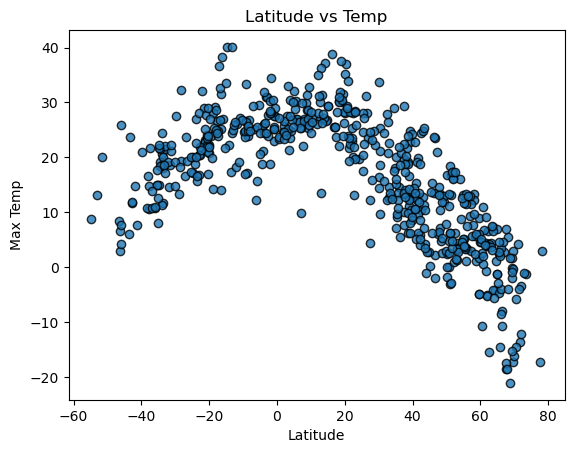

In [ ]:
# Build scatter plot for latitude vs. temperature
x_axis=city_data_df['Lat']
y_axis=city_data_df['Max Temp']

plt.scatter(x_axis,y_axis,marker="o", alpha =0.80, edgecolors="k")
plt.xlabel('Latitude')
plt.ylabel("Max Temp")
plt.title(f'Latitude vs Temp')
plt.grid

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

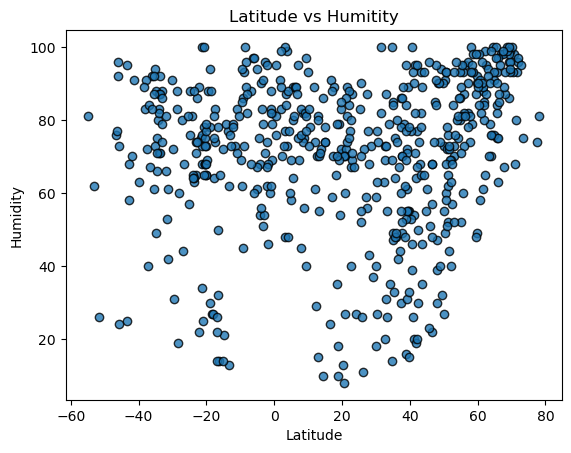

In [ ]:
# Build the scatter plots for latitude vs. humidity
x_axis=city_data_df['Lat']
y_axis=city_data_df['Humidity']

plt.scatter(x_axis,y_axis,marker="o", alpha =0.80, edgecolors="k")
plt.xlabel('Latitude')
plt.ylabel("Humidity")
plt.title(f'Latitude vs Humitity')
plt.grid
# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

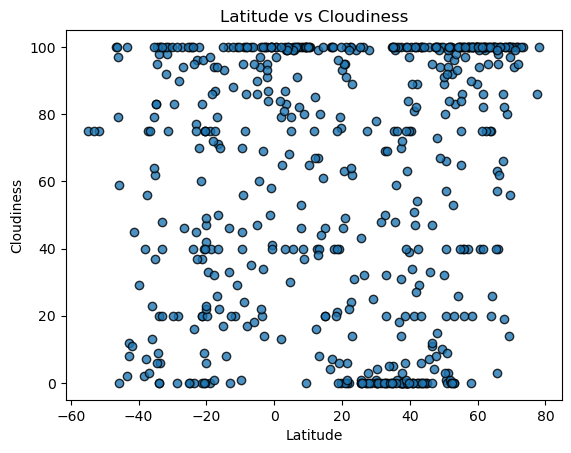

In [ ]:
# Build the scatter plots for latitude vs. cloudiness
x_axis=city_data_df['Lat']
y_axis=city_data_df['Cloudiness']

plt.scatter(x_axis,y_axis,marker="o", alpha =0.80, edgecolors="k")
plt.xlabel('Latitude')
plt.ylabel("Cloudiness")
plt.title(f'Latitude vs Cloudiness')
plt.grid

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

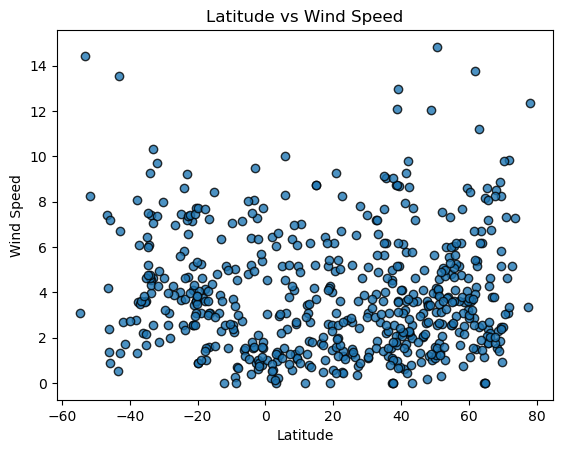

In [ ]:
# Build the scatter plots for latitude vs. wind speed
x_axis=city_data_df['Lat']
y_axis=city_data_df['Wind Speed']

plt.scatter(x_axis,y_axis,marker="o", alpha =0.80, edgecolors="k")
plt.xlabel('Latitude')
plt.ylabel("Wind Speed")
plt.title(f'Latitude vs Wind Speed')
plt.grid

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [ ]:
# Define a function to create Linear Regression plots
linregress(x_axis,y_axis)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
slope
intercept
y=  slope*1+ intercept
y
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

In [ ]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df=city_data_df.loc[city_data_df["Lat"]>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,faya,18.3851,42.4509,22.06,35,21,2.60,SA,1666108228
1,farsund,58.0948,6.8047,13.30,100,0,7.65,NO,1666108228
3,jamestown,42.0970,-79.2353,5.77,77,100,9.77,US,1666107934
4,lanzhou,36.0564,103.7922,14.53,48,59,1.20,CN,1666108230
6,albany,42.6001,-73.9662,10.36,74,29,2.10,US,1666108231


In [ ]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df=city_data_df.loc[city_data_df["Lat"]<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,new norfolk,-42.7826,147.0587,11.72,58,12,1.34,AU,1666108230
5,ushuaia,-54.8000,-68.3000,8.81,81,75,3.09,AR,1666108231
7,carnarvon,-24.8667,113.6333,20.02,76,0,7.46,AU,1666108232
9,saint-pierre,-21.3393,55.4781,22.82,68,0,5.14,RE,1666108236
10,colorado,-22.8375,-51.9731,20.36,86,96,4.69,BR,1666107965


###  Temperature vs. Latitude Linear Regression Plot

the r-value is:0.020567354299943663


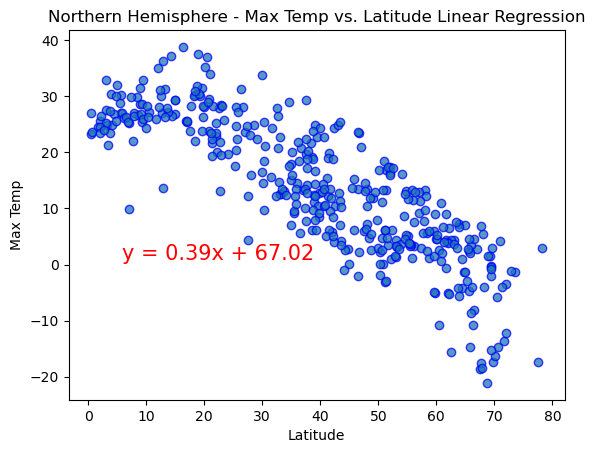

In [ ]:
# Linear regression on Northern Hemisphere
x_axis7= northern_hemi_df['Lat']
y_axis8=northern_hemi_df['Max Temp']



plt.scatter(x_axis7,y_axis8, marker="o", edgecolors="blue",alpha=0.75)
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.show
print(f"the r-value is:{rvalue**2}")
plt.savefig("../output_data/Fig5.png")


the r-value is:0.020567354299943663


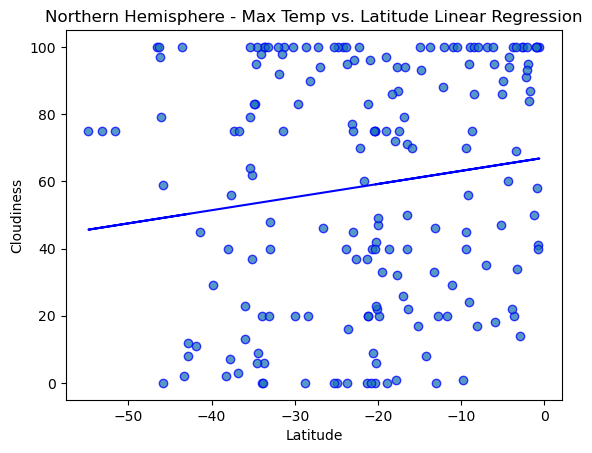

In [108]:
# Linear regression on Southern Hemisphere
x_axis5= southern_hemi_df["Lat"]
y_axis6=southern_hemi_df['Cloudiness']

plt.annotate(line_eq, (20,36),fontsize=15)
plt.plot(x_axis5,regress_values, color="blue")
plt.scatter(x_axis5,y_axis6, marker="o", edgecolors="blue",alpha=0.75)
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show
print(f"the r-value is:{rvalue**2}")
plt.savefig("../output_data/Fig6png")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

the r-value is:0.020567354299943663


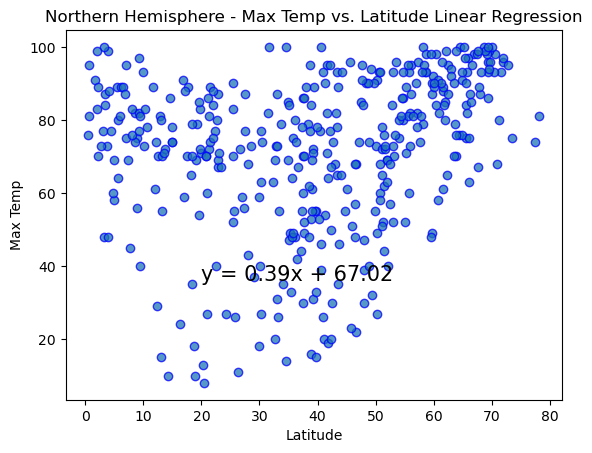

In [109]:
# Northern Hemisphere
x_axis3= northern_hemi_df['Lat']
y_axis4=northern_hemi_df['Humidity']

plt.annotate(line_eq, (20,36),fontsize=15)

plt.scatter(x_axis3,y_axis4, marker="o", edgecolors="blue",alpha=0.75)
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.show
print(f"the r-value is:{rvalue**2}")
plt.savefig("../output_data/Fig7.png")

the r-value is:0.020567354299943663


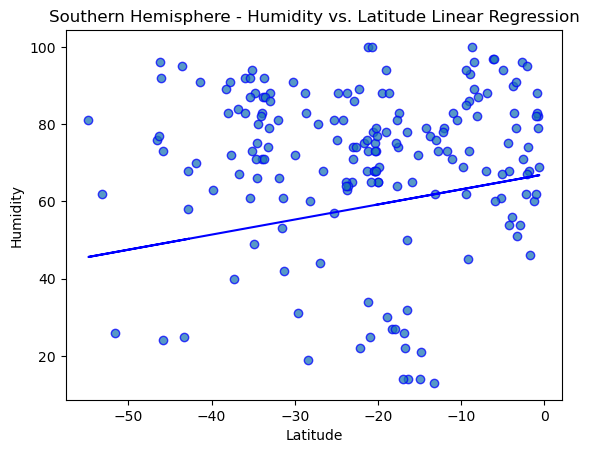

In [110]:
# Southern Hemisphere
x_axis1= southern_hemi_df['Lat']
y_axis2=southern_hemi_df['Humidity']

plt.annotate(line_eq, (20,36),fontsize=15)
plt.plot(x_axis1,regress_values, color="blue")
plt.scatter(x_axis1,y_axis2, marker="o", edgecolors="blue",alpha=0.75)
plt.title("Southern Hemisphere - Humidity vs. Latitude Linear Regression")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show
print(f"the r-value is:{rvalue**2}")
plt.savefig("../output_data/Fig8.png")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

the r-value is:0.020567354299943663


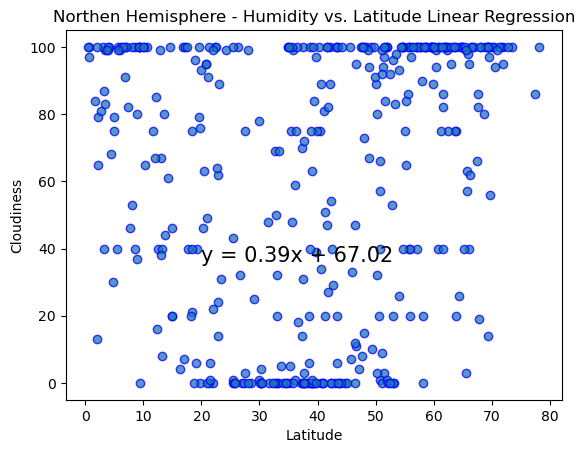

In [111]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
plt.annotate(line_eq, (20,36),fontsize=15)

plt.scatter(x_values,y_values, marker="o", edgecolors="blue",alpha=0.75)
plt.title("Northen Hemisphere - Humidity vs. Latitude Linear Regression")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show
print(f"the r-value is:{rvalue**2}")
plt.savefig("../output_data/Fig9.png")

the r-value is:0.020567354299943663


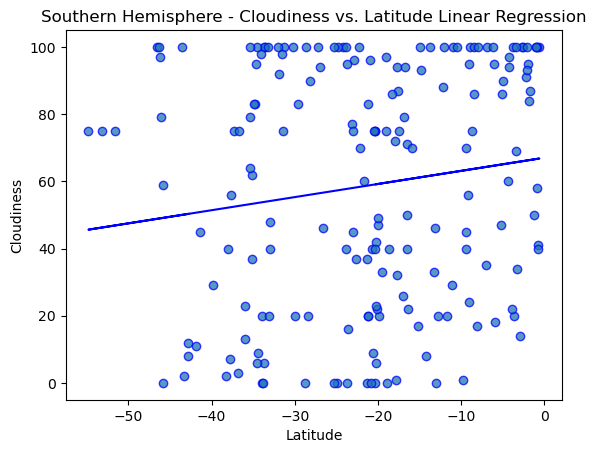

In [112]:
# Southern Hemisphere
x_axis1= southern_hemi_df['Lat']
y_axis2=southern_hemi_df['Cloudiness']

plt.annotate(line_eq, (20,36),fontsize=15)
plt.plot(x_axis1,regress_values, color="blue")
plt.scatter(x_axis1,y_axis2, marker="o", edgecolors="blue",alpha=0.75)
plt.title("Southern Hemisphere - Cloudiness vs. Latitude Linear Regression")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show
print(f"the r-value is:{rvalue**2}")
plt.savefig("../output_data/Fig10.png")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

the r-value is:0.020567354299943663


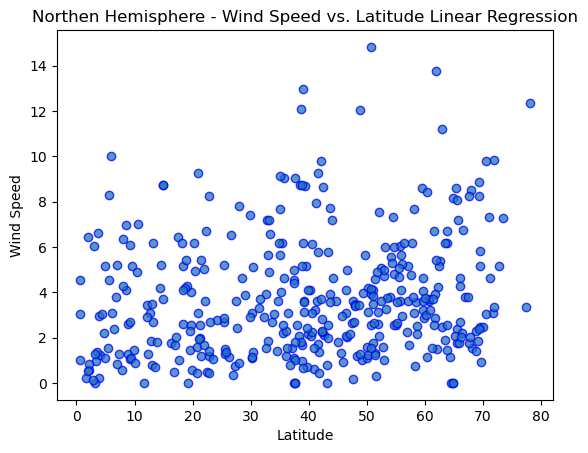

In [113]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
plt.annotate(line_eq, (20,36),fontsize=15)

plt.scatter(x_values,y_values, marker="o", edgecolors="blue",alpha=0.75)
plt.title("Northen Hemisphere - Wind Speed vs. Latitude Linear Regression")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show
print(f"the r-value is:{rvalue**2}")
plt.savefig("../output_data/Fig11.png")

the r-value is:0.020567354299943663


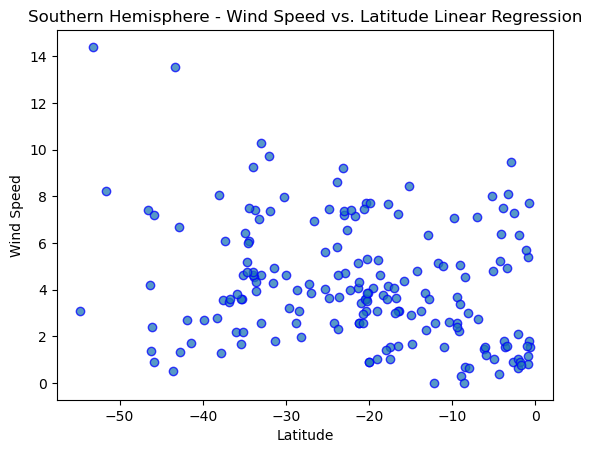

In [114]:
# Southern Hemisphere
x_axis1= southern_hemi_df['Lat']
y_axis2=southern_hemi_df['Wind Speed']

plt.annotate(line_eq, (20,36),fontsize=15)

plt.scatter(x_axis1,y_axis2, marker="o", edgecolors="blue",alpha=0.75)
plt.title("Southern Hemisphere - Wind Speed vs. Latitude Linear Regression")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show
print(f"the r-value is:{rvalue**2}")
plt.savefig("../output_data/Fig12.png")

**Discussion about the linear relationship:** YOUR RESPONSE HERE